In [10]:
import cv2
import os

vid_name_without_ext= 'P3'
video_path = f'./data/Videos/{vid_name_without_ext}.avi'


cap = cv2.VideoCapture(video_path)
frame_count = 0

while True:
    output_folder = f"./frames/{vid_name_without_ext}_frames"
    os.makedirs(output_folder, exist_ok=True)
    
    ret, frame = cap.read()
    if not ret:
        break
    frame_filename = f"{output_folder}/{frame_count:05d}.jpg"  
    cv2.imwrite(frame_filename, frame)
    frame_count += 1

cap.release()   # You should call cap.release() when you’re done using the cap object to ensure that the resources are released properly. 



In [2]:
import cv2

frames = []
vid_name_without_ext= 'P3'
video_path = f'./data/Videos/{vid_name_without_ext}.avi'
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()

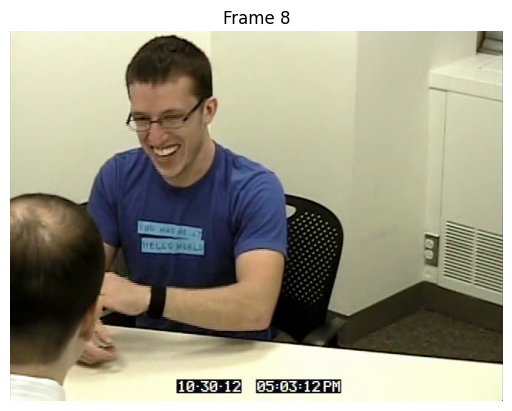

frame 8: 8.518875122070312
frame 8: 0.96


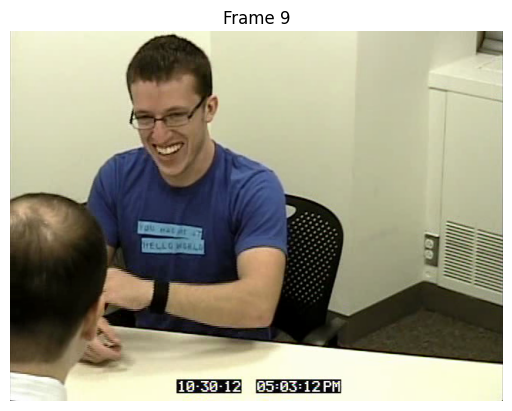

frame 9: 81.0869140625
frame 9: 0.96


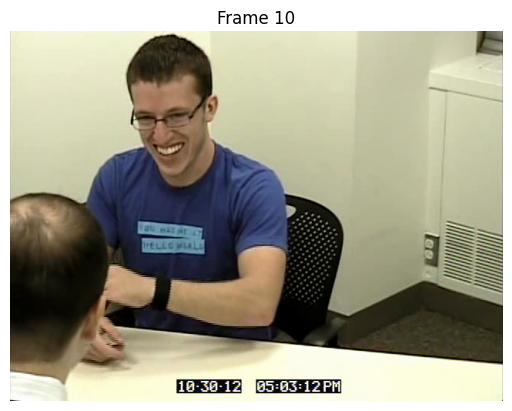

frame 10: 82.83403778076172
frame 10: 0.97


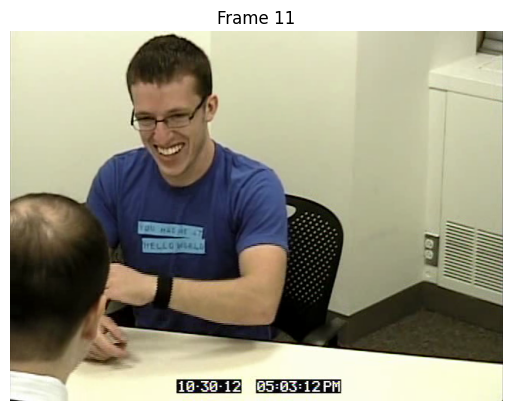

frame 11: 62.768646240234375
frame 11: 0.98


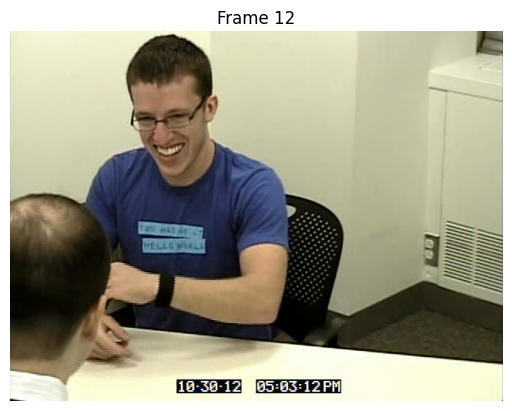

frame 12: 98.05985260009766
frame 12: 0.97


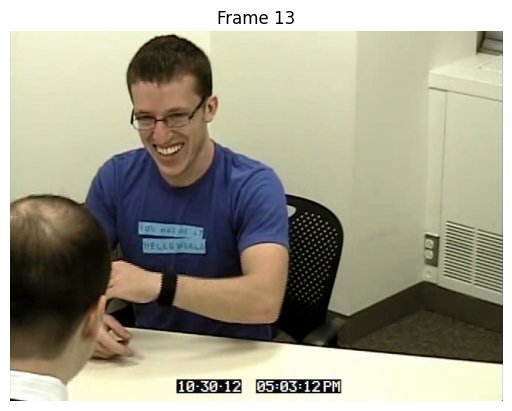

frame 13: 74.92460632324219
frame 13: 0.97


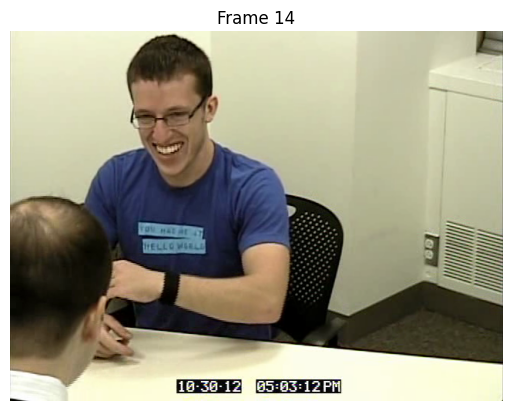

frame 14: 6.600866317749023
frame 14: 0.97


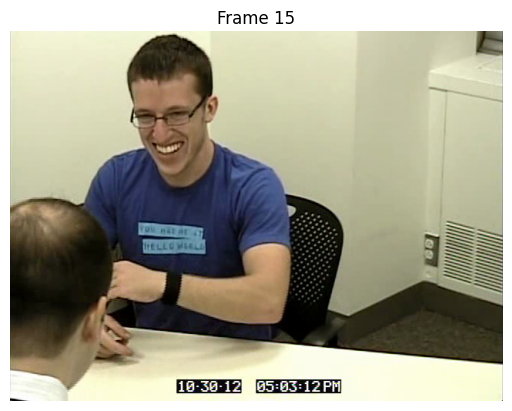

frame 15: 71.06267547607422
frame 15: 0.97


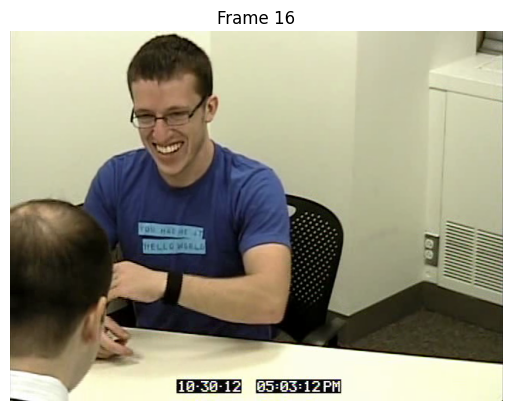

frame 16: 94.86954498291016
frame 16: 0.96


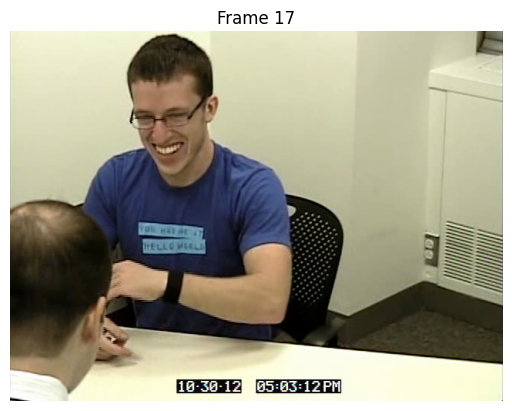

frame 17: 34.49718475341797
frame 17: 0.96


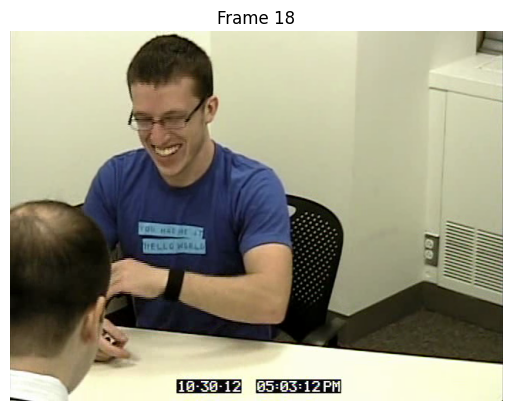

frame 18: 19.228410720825195
frame 18: 0.97
57.677425


In [6]:
from deepface import DeepFace
import numpy as np
import matplotlib.pyplot as plt

intensity_scores = []
for i, frame in enumerate(frames[:30]):
    result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
    if result[0].get('face_confidence', 0) != 0:
        smile_intensity = result[0]['emotion']['happy']
        intensity_scores.append(smile_intensity)    
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {i}")
        plt.axis('off')
        plt.show()
        print(f"frame {i}: {smile_intensity}")
        print(f"frame {i}: { result[0].get('face_confidence', 0)}")
    

if intensity_scores:
    average_smile_intensity = np.mean(intensity_scores)
else:
    average_smile_intensity = 0 

print( average_smile_intensity)